In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
import pathlib

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
data_dir='./datasets/fruits'

In [3]:
data_dir=pathlib.Path(data_dir)

In [4]:
image_count=len(list(data_dir.glob('*/*.jpg')))
image_count

16623

In [5]:
mango=list(data_dir.glob('Mango/*'))

In [6]:
mango

[WindowsPath('datasets/fruits/Mango/Mango_0.jpg'),
 WindowsPath('datasets/fruits/Mango/Mango_1.jpg'),
 WindowsPath('datasets/fruits/Mango/Mango_10.jpg'),
 WindowsPath('datasets/fruits/Mango/Mango_100.jpg'),
 WindowsPath('datasets/fruits/Mango/Mango_101.jpg'),
 WindowsPath('datasets/fruits/Mango/Mango_102.jpg'),
 WindowsPath('datasets/fruits/Mango/Mango_103.jpg'),
 WindowsPath('datasets/fruits/Mango/Mango_104.jpg'),
 WindowsPath('datasets/fruits/Mango/Mango_105.jpg'),
 WindowsPath('datasets/fruits/Mango/Mango_106.jpg'),
 WindowsPath('datasets/fruits/Mango/Mango_107.jpg'),
 WindowsPath('datasets/fruits/Mango/Mango_108.jpg'),
 WindowsPath('datasets/fruits/Mango/Mango_109.jpg'),
 WindowsPath('datasets/fruits/Mango/Mango_11.jpg'),
 WindowsPath('datasets/fruits/Mango/Mango_110.jpg'),
 WindowsPath('datasets/fruits/Mango/Mango_111.jpg'),
 WindowsPath('datasets/fruits/Mango/Mango_112.jpg'),
 WindowsPath('datasets/fruits/Mango/Mango_113.jpg'),
 WindowsPath('datasets/fruits/Mango/Mango_114.jpg'),

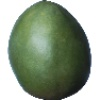

In [7]:
PIL.Image.open(str(mango[1]))

In [8]:
fruits_image_dict={
    'apple':list(data_dir.glob('AppleBraeburn/*')),
    'avocado':list(data_dir.glob('Avocado/*')),
    'banana':list(data_dir.glob('Banana/*')),
    'cherry':list(data_dir.glob('Cherry/*')),
    'grapes':list(data_dir.glob('Grape/*')),
    'kiwi':list(data_dir.glob('Kiwi/*')),
    'lemon':list(data_dir.glob('Lemon/*')),
    'mango':list(data_dir.glob('Mango/*')),
    'orange':list(data_dir.glob('Orange/*')),
    'peach':list(data_dir.glob('Peach/*')),
    'pear':list(data_dir.glob('Pear/*')),
    'passion_fruit':list(data_dir.glob('Passion_Fruit/*')),
    'strawberry':list(data_dir.glob('Strawberry/*')),
    'plum':list(data_dir.glob('Plum/*')),
    'pomegranate':list(data_dir.glob('Pomegranate/*')),
    'raspberry':list(data_dir.glob('Raspberry/*')),
    'watermelon':list(data_dir.glob('Watermelon/*'))
}

In [9]:
fruits_labels_dict={
    'apple':0,
    'avocado':1,
    'banana':2,
    'cherry':3,
    'grapes':4,
    'kiwi':5,
    'lemon':6,
    'mango':7,
    'orange':8,
    'peach':9,
    'pear':10,
    'passion_fruit':11,
    'strawberry':12,
    'plum':13,
    'pomegranate':14,
    'raspberry':15,
    'watermelon':16
}

In [10]:
(fruits_image_dict['apple'])

[WindowsPath('datasets/fruits/AppleBraeburn/Apple Braeburn_0.jpg'),
 WindowsPath('datasets/fruits/AppleBraeburn/Apple Braeburn_1.jpg'),
 WindowsPath('datasets/fruits/AppleBraeburn/Apple Braeburn_10.jpg'),
 WindowsPath('datasets/fruits/AppleBraeburn/Apple Braeburn_100.jpg'),
 WindowsPath('datasets/fruits/AppleBraeburn/Apple Braeburn_101.jpg'),
 WindowsPath('datasets/fruits/AppleBraeburn/Apple Braeburn_102.jpg'),
 WindowsPath('datasets/fruits/AppleBraeburn/Apple Braeburn_103.jpg'),
 WindowsPath('datasets/fruits/AppleBraeburn/Apple Braeburn_104.jpg'),
 WindowsPath('datasets/fruits/AppleBraeburn/Apple Braeburn_105.jpg'),
 WindowsPath('datasets/fruits/AppleBraeburn/Apple Braeburn_106.jpg'),
 WindowsPath('datasets/fruits/AppleBraeburn/Apple Braeburn_107.jpg'),
 WindowsPath('datasets/fruits/AppleBraeburn/Apple Braeburn_108.jpg'),
 WindowsPath('datasets/fruits/AppleBraeburn/Apple Braeburn_109.jpg'),
 WindowsPath('datasets/fruits/AppleBraeburn/Apple Braeburn_11.jpg'),
 WindowsPath('datasets/fru

In [11]:
img = cv2.imread(str(fruits_image_dict['apple'][0]))

In [12]:
img.shape

(100, 100, 3)

In [13]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [14]:

X, y = [], []

for fruits_name, images in fruits_image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(fruits_labels_dict[fruits_name])

In [15]:
X = np.array(X)
y = np.array(y)

In [16]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [17]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [20]:
num_classes = 17

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
206/206 [==============================] - 117s 507ms/step - loss: 0.3008 - accuracy: 0.9042
Epoch 2/30
206/206 [==============================] - 89s 433ms/step - loss: 0.0039 - accuracy: 0.9991
Epoch 3/30
206/206 [==============================] - 89s 433ms/step - loss: 1.0501e-04 - accuracy: 1.0000
Epoch 4/30
206/206 [==============================] - 90s 439ms/step - loss: 5.2608e-05 - accuracy: 1.0000
Epoch 5/30
206/206 [==============================] - 94s 458ms/step - loss: 3.3129e-05 - accuracy: 1.0000
Epoch 6/30
206/206 [==============================] - 111s 537ms/step - loss: 2.2096e-05 - accuracy: 1.0000
Epoch 7/30
206/206 [==============================] - 115s 560ms/step - loss: 1.5855e-05 - accuracy: 1.0000
Epoch 8/30
206/206 [==============================] - 114s 556ms/step - loss: 1.2080e-05 - accuracy: 1.0000
Epoch 9/30
206/206 [==============================] - 116s 564ms/step - loss: 9.4743e-06 - accuracy: 1.0000
Epoch 10/30
206/206 [===================

In [21]:
model.evaluate(X_test_scaled,y_test)

69/69 [==============================] - 15s 99ms/step - loss: 4.8567e-07 - accuracy: 1.0000


[4.856742634729017e-07, 1.0]

In [22]:
predictions = model.predict(X_test_scaled)
predictions

array([[ 26.912437  ,  -4.466052  ,   0.1182248 , ...,  11.394128  ,
        -26.72155   , -10.624365  ],
       [ -3.329229  ,  34.10214   ,  14.731817  , ...,   0.4015718 ,
         -3.766877  ,  14.665177  ],
       [  3.117753  ,  -1.0336945 ,  -1.600435  , ...,   1.3180176 ,
        -12.645463  ,  -9.787975  ],
       ...,
       [ -2.58299   ,   0.23428708,  -3.4066172 , ...,   0.82933956,
          1.7883483 ,  11.443587  ],
       [ 10.238195  ,  -4.5366745 ,   3.2281332 , ...,  11.816109  ,
          9.348781  ,  -2.4981506 ],
       [ 20.947817  ,  -1.0704875 ,  12.435943  , ...,  -4.480484  ,
        -52.02128   ,  -8.542536  ]], dtype=float32)

In [27]:
score = tf.nn.softmax(predictions[2])

In [28]:
score

<tf.Tensor: shape=(17,), dtype=float32, numpy=
array([9.8834567e-09, 1.5558130e-10, 8.8272473e-11, 2.6536043e-13,
       1.0383690e-11, 1.0000000e+00, 2.0035781e-08, 4.3551824e-12,
       9.2339197e-18, 5.0520158e-11, 7.0686976e-09, 1.3989708e-27,
       1.1490606e-11, 1.6555303e-12, 1.6341557e-09, 1.4093870e-15,
       2.4548323e-14], dtype=float32)>

In [29]:
np.argmax(score)

5

In [30]:
y_test[0]

0

In [31]:
tf.keras.metrics.Accuracy(
    name='accuracy', dtype=None
)

In [32]:
m = tf.keras.metrics.Accuracy()

In [34]:
m.update_state([[1], [2], [3], [4]], [[0], [2], [3], [4]])
m.result().numpy()


0.75

In [37]:
    json_model = model.to_json()
    open('model_architecture.json', 'w').write(json_model)
    # saving weights
    model.save_weights('model.h5', overwrite=True)
